In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
pollutionDS = pd.read_csv("pollution_us_2000_2016.csv")

In [3]:
pollutionDS.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [4]:
pollutionDS.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [5]:
pollutionDS

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.200,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.200,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.200,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,Parts per billion,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN


In [6]:
pollutants = ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']

grouped_data = pollutionDS[pollutants + ['Date Local']].groupby('Date Local').mean()
grouped_data.index = pd.to_datetime(grouped_data.index)
grouped_data.head()

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
Date Local,,,,
2000-01-01,32.307692,23.974359,13.384615,16.000000
2000-01-02,27.184211,26.973684,11.315789,11.342105
2000-01-03,37.233766,19.038961,11.454545,16.131579
2000-01-04,38.650000,18.150000,10.125000,18.050000
2000-01-05,38.700000,21.675000,11.375000,17.775000


<AxesSubplot:xlabel='Date Local'>

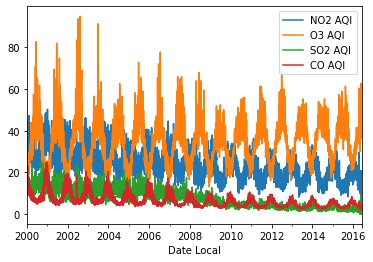

In [7]:
grouped_data.plot()

In [47]:
no2_dec = seasonal_decompose(grouped_data['NO2 AQI'], model='additive', period=365)
o3_dec = seasonal_decompose(grouped_data['O3 AQI'], model='additive', period=365)
so2_dec = seasonal_decompose(grouped_data['SO2 AQI'], model='additive', period=365)
co_dec = seasonal_decompose(grouped_data['CO AQI'], model='additive', period=365)

In [48]:
type(no2_dec)

statsmodels.tsa.seasonal.DecomposeResult

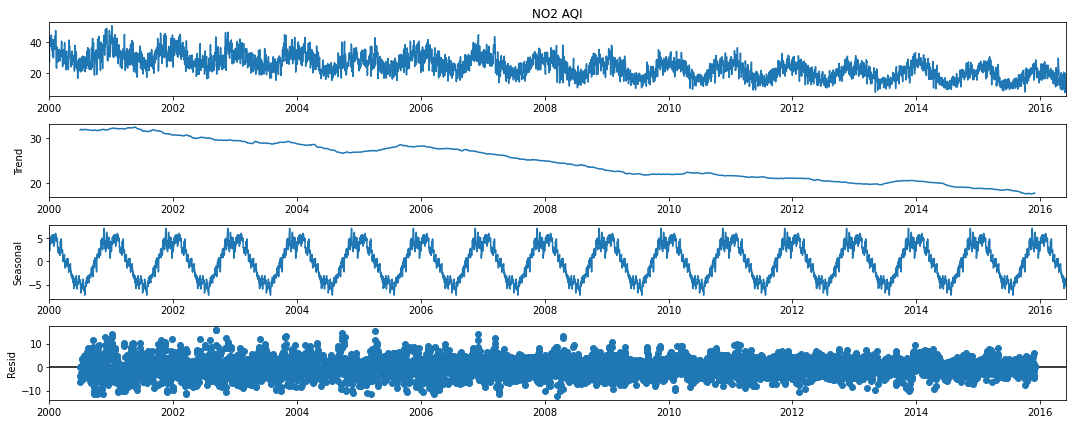

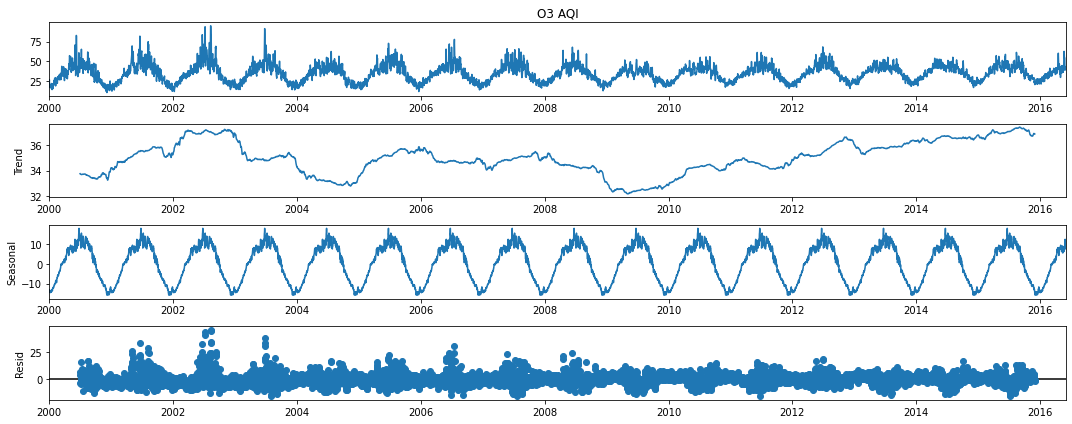

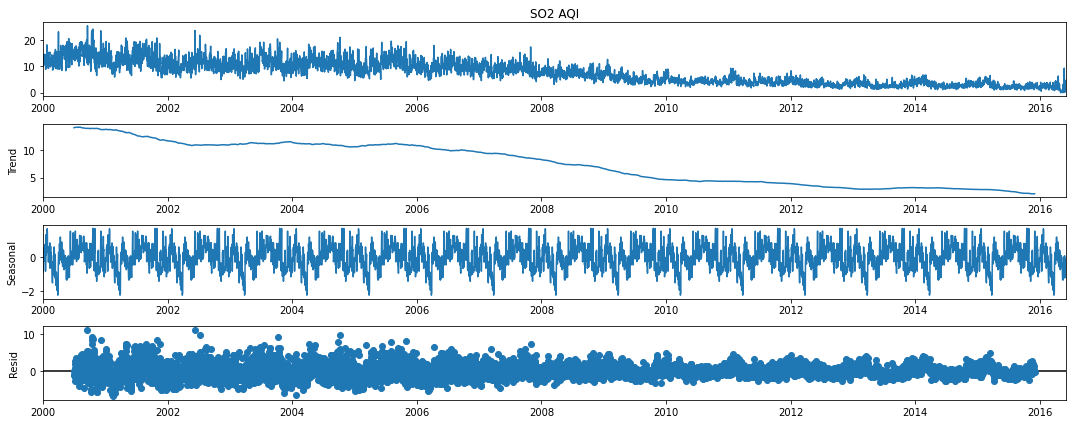

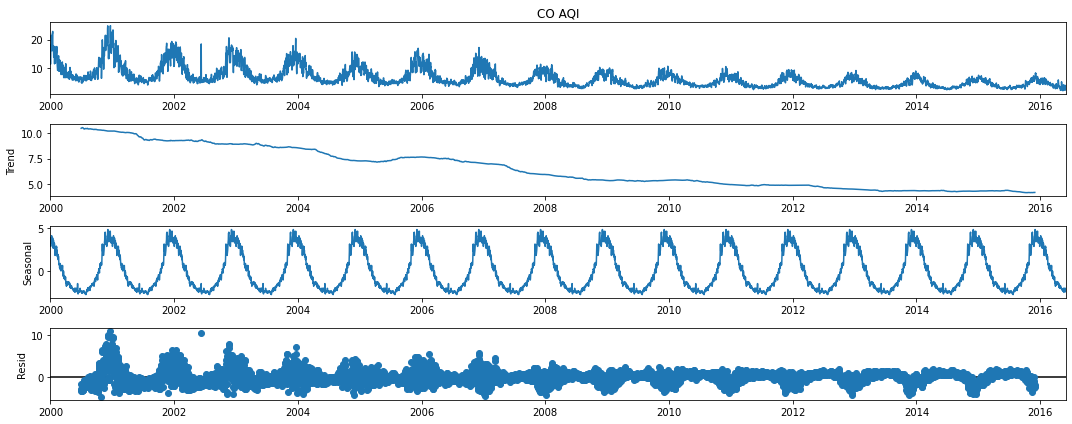

In [54]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
fig1 = no2_dec.plot()
fig2 = o3_dec.plot()
fig3 = so2_dec.plot()
fig4 = co_dec.plot()